# Google Stock Price Prediction

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Input
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta
import torch
import yfinance as yf


## Data Collection

In [2]:
# Retrieving data from Yahoo Finance API

ticker = "GOOG"
df = yf.download(ticker, start='2000-01-01', end='2024-06-30')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512
...,...,...,...,...,...,...
2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18198300
2024-06-25,181.145004,185.750000,181.104996,185.580002,185.580002,18917700
2024-06-26,184.199997,185.929993,183.990005,185.369995,185.369995,13375700


<function matplotlib.pyplot.show(close=None, block=None)>

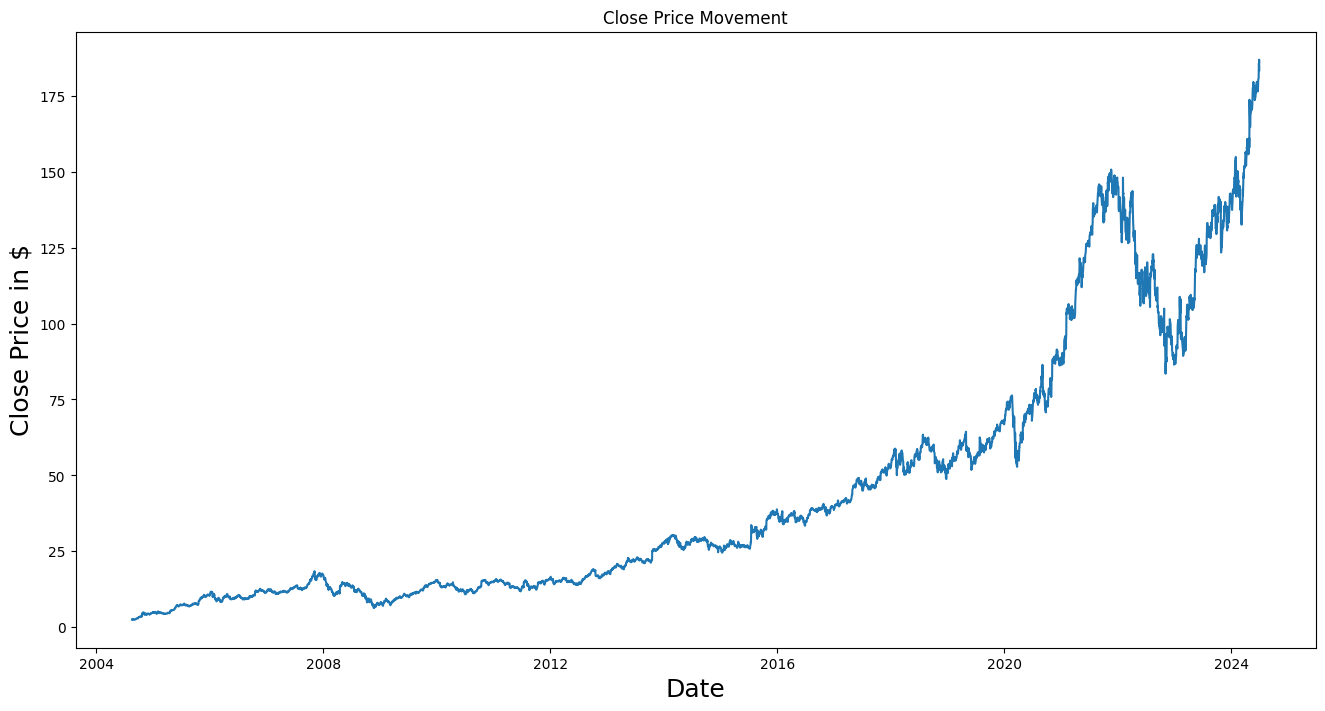

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close Price Movement')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in $', fontsize=18)
plt.show

In [4]:
# Filtering target values from dataset

data = df.filter(['Close'])
dataset = data.values
len(dataset)

4999

In [5]:
# 70% of db will be for training

training_data_size = math.ceil(len(dataset)*.70)
training_data_size

3500

## Scaling and Preprocessing

In [6]:
# Scaling

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[4.45855424e-05],
       [1.12126212e-03],
       [1.26851028e-03],
       ...,
       [9.91918355e-01],
       [1.00000000e+00],
       [9.81341761e-01]])

In [7]:
train_data = scaled_data[0:training_data_size, :]
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(X_train)
        print(y_train)
        

[array([4.45855424e-05, 1.12126212e-03, 1.26851028e-03, 6.56547263e-04,
       8.09198239e-04, 1.06722358e-03, 8.29462044e-04, 2.70186214e-04,
       3.18818052e-04, 3.24246734e-05, 2.02638044e-04, 0.00000000e+00,
       2.12096210e-04, 3.09363765e-04, 3.10713823e-04, 7.18688735e-04,
       1.01183499e-03, 1.55085219e-03, 1.61974654e-03, 1.88587482e-03,
       2.36139919e-03, 2.61401784e-03, 2.40867968e-03, 2.48162549e-03,
       2.81125306e-03, 2.67751066e-03, 2.46541962e-03, 3.62720289e-03,
       4.19728823e-03, 3.99735160e-03, 4.39992499e-03, 4.73494761e-03,
       5.18210008e-03, 5.00783524e-03, 5.24694296e-03, 5.09564333e-03,
       4.76196947e-03, 5.05106426e-03, 5.52388205e-03, 5.67248026e-03,
       5.95752358e-03, 6.63973618e-03, 6.47492563e-03, 5.46849346e-03,
       6.66945427e-03, 9.78331046e-03, 1.18056226e-02, 1.10491142e-02,
       1.16124453e-02, 1.26026613e-02, 1.22433208e-02, 1.29714599e-02,
       1.28147575e-02, 1.23824621e-02, 1.14408767e-02, 9.36722615e-03,
     

In [8]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3440, 60, 1)

## LSTM Neural Network

In [9]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

3440/3440 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - loss: 2.6458e-04


In [12]:
test_data = scaled_data[training_data_size - 60: ,:]
X_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    

In [13]:
X_test = np.array(X_test)

In [14]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [15]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


## Model Results

In [16]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f'RMSE: {rmse}')

RMSE: 1.2164205101985308


In [17]:
r2 = r2_score(y_test, predictions)
print(f'R2 Score: {r2}')

R2 Score: 0.9890590456605557


/var/folders/hp/th34z1tx09z2w9h79rlbbxj00000gn/T/ipykernel_8509/1061345655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, 'predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

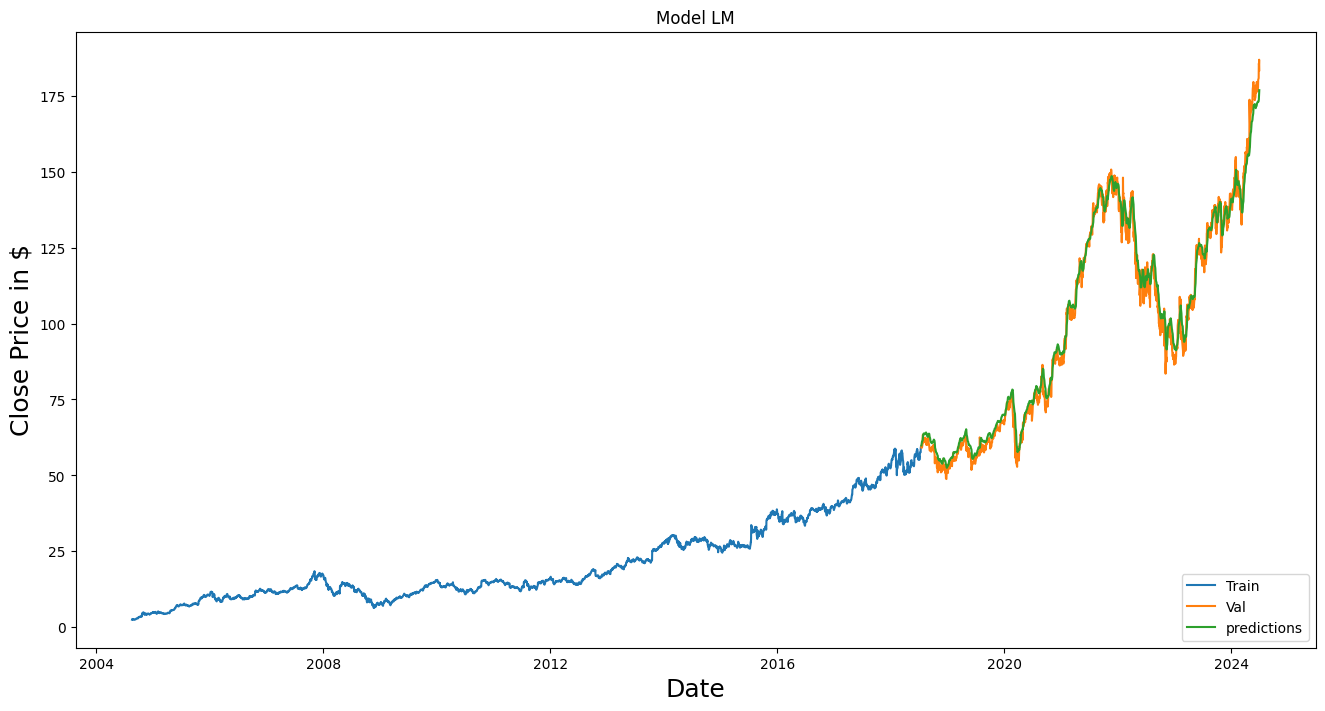

In [18]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid.loc[:, 'predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Val','predictions'], loc='lower right')
plt.show

In [19]:
valid

,Close,predictions
Date,,
2018-07-16,59.193001,59.875637
2018-07-17,59.939999,60.270847
2018-07-18,59.793999,60.681107
2018-07-19,59.348000,61.024521
2018-07-20,59.245499,61.236271
...,...,...
2024-06-24,180.789993,173.239792
2024-06-25,185.580002,173.674637
2024-06-26,185.369995,174.684433


## Prediction based on 5 day lookback

In [20]:
# Fetching recent data through Yahoo Finance API

def fetch_recent_data(ticker, lookback_period):
    end_date = datetime.now().date()
    start_date = end_date - timedelta(days=lookback_period + 10)

    recent_data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    return recent_data


ticker = "GOOG"
lookback_period = 5
recent_data = fetch_recent_data(ticker, lookback_period)
recent_data

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2024-07-29,171.130005
2024-07-30,171.860001
2024-07-31,173.149994
2024-08-01,172.449997
2024-08-02,168.399994
2024-08-05,160.639999
2024-08-06,160.539993
2024-08-07,160.750000
2024-08-08,163.839996


In [21]:
def predict_stock_price(model, recent_data, scaler, lookback_period=60):
    # Convert to numpy array
    if isinstance(recent_data, pd.DataFrame):
        recent_data = recent_data.values
    
    # Scale recent data
    recent_data_scaled = scaler.transform(recent_data.reshape(-1, 1))
    
    # Padding
    if len(recent_data_scaled) < lookback_period:
        padding = np.full((lookback_period - len(recent_data_scaled), 1), recent_data_scaled[0])
        recent_data_scaled = np.concatenate((padding, recent_data_scaled), axis=0)
    
    # Reshape recent data
    X = recent_data_scaled.reshape((1, lookback_period, 1))
    
    # Make prediction
    if hasattr(model, 'predict'):
        prediction_scaled = model.predict(X).flatten()
    else:
        raise TypeError("Model must have a 'predict' method.")
    
    # Transform  prediction to original scale
    predicted_price = scaler.inverse_transform(prediction_scaled.reshape(-1, 1)).flatten()[0]
    
    return predicted_price


In [22]:
predicted_price = (predict_stock_price(model, recent_data, scaler))
print(f'Stock Price Prediction: ${predicted_price:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Stock Price Prediction: $161.95
